# Program1. Naive bayes classification

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
x = iris.data
y = iris.target

In [2]:
#splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [3]:
#Naive bayes classification model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

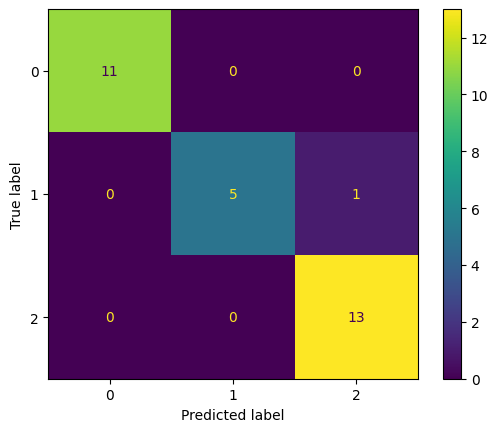

In [4]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm_diplay = ConfusionMatrixDisplay(cm)
cm_diplay.plot()

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [6]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Error :",1-accuracy_score(y_test,y_pred))

Accuracy : 0.9666666666666667
Error : 0.033333333333333326


In [7]:
n_classes = cm.shape[0]

for i in range(n_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}:")
    print(f"  TP = {TP}")
    print(f"  TN = {TN}")
    print(f"  FP = {FP}")
    print(f"  FN = {FN}")
    print(f"  Specificity = {specificity:.4f}")
    print("-" * 30)

Class 0:
  TP = 11
  TN = 19
  FP = 0
  FN = 0
  Specificity = 1.0000
------------------------------
Class 1:
  TP = 5
  TN = 24
  FP = 0
  FN = 1
  Specificity = 1.0000
------------------------------
Class 2:
  TP = 13
  TN = 16
  FP = 1
  FN = 0
  Specificity = 0.9412
------------------------------


In [8]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(5,shuffle=True,random_state=10)
cv_mean_accuracy = cross_val_score(model,x,y,cv=kfold,scoring='accuracy').mean()

print("Cross validation mean accuracy :",cv_mean_accuracy)

Cross validation mean accuracy : 0.9466666666666667


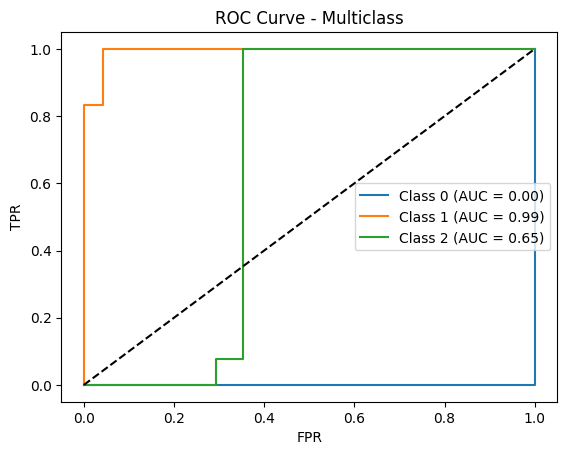

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], model.predict_proba(x_test)[:, 1])  # take prob for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Multiclass")
plt.legend()
plt.show()